# Confusion


Confusion noise from Condon (74) and Harper et al AME constraints in LDN 1622 with the GBT
θ in arcminutes
S in mJy
ν in GHz
S=0.2θ2ν−0.7


In [45]:
import math
theta=0.05
nu=1.8
s=0.2*theta**2 /nu**-0.7
print s*1e3,'microJy'

0.754502629924 microJy


In [26]:
def conf3(theta,f): #from Bernardi et al 2014 LEDA preprint
    sig= 200*(theta/16.)**2 *(f/0.150)**(-0.7) # to mJy
    return sig
print conf3(3,1.8)

1.23482572227


#Long version of Condon (SKA memo 114)

$n(S) =8.23 S^{-2.4} $ sources per steradian at flux density S from VLA surveys 
$\gamma =2.4$
$k=8.23$
$\Omega_e = \frac {\Omega_{beam}}{\gamma-1}$

$\sigma_c  = {\frac{q^{3-\gamma}}{3-\gamma}}^{\frac{1}{1-\gamma}}  {k \Omega_e}^{\frac{1}{1-\gamma}}$

In [27]:
def conf2(beam,k=8.23,g=2.4,q=5): #beam in arcmin
    x=60./206265. # arcmin/radian
    omega= 1.133*beam*x**2
    pow=1./(g-1)
    omegae=omega*pow
    sig=((q**(3-g))/(3-g))**(pow)
    sig=sig*(k*omegae)**(pow)
    return sig*1000 #from Jy to mJy
    

In [28]:
print conf2(beam=3.0,k=8.23,g=2.4,q=10)

0.291226444956


# Values from "Resolving the Radio Source Background 
##Condon et al preprint p 7
1 to 10 $\mu Jy$

$$n(S) = 1.2\times 10^5 S^{-1.5} Jy^{-1} Sr^{-1}$$

and he quotes Wilman et al 2008 as

$$n(S) = 3.45\times 10^4 S^{-1.6} Jy^{-1} Sr^{-1}$$

In [29]:
print conf2(beam=3.0,k=1.2e5,g=1.5,q=5)
print conf2(beam=3.0,k=3.45e4,g=1.6,q=5)

264.700733352
26.191919682


In [30]:
# From fig 1 of Condon preprint about 1mJy
g=2.0
#log S**2*n is about 2.2 S=1e-3
#10**2.2 = k*1e-6
k=1e6*10**(2.2)
g=2.
print conf2(3.0,k,g,5)

227914.831358


In [31]:
sigc=conf2(3.0,q=10)

In [32]:
print sigc

0.291226444956


In [33]:
print conf2(3.0,6.0,2.5,5.0)

0.298024326255


In [34]:
def n1(s):
    n=8.23*s**(-2.4) # sources above s per steradian
    na=n*(3*60./206265.)**2 # sources above s per beam
    return na

def n2(s):
    n=6.0*s**(-2.5)
    na=n*(3*60./206265.)**2 
    return na

print n1(0.001), n2(0.001) # number of 1mJy sources

99.3330483006 144.492457768


In [35]:
# adjust from 1.4 to 1.8GHz

In [36]:
# Bernardi et al 2010
# quoted by Greenhill, removing his typo
def bernardi(beam,f):
    x=beam*1.5 #from 3arcmin to 2 arcmin
    nu=f/0.150 # from GHz to 150MHz
    con=3*x*nu**(-0.7)
    return con


In [37]:
print bernardi(60,1.4)

56.5376848293


In [38]:
#Completely separately from Tegmark M, Efstathiou G. 1996. MNRAS 281:1297-1314
allsky =4*math.pi
sources= 6e6 # sources from FIRST above 0.75mJy
perster=sources/allsky
#sources per steradian from Tegmark + Efstathiou above mJy about 3e5
print "Sources per steradian",perster
beam=(math.radians(3./60.))**2 # 3 arcminute beam
beam=beam*math.pi/4
print "Beam in ster",beam
perbeam=perster*beam
print "Sources per beam" ,perbeam

Sources per steradian 477464.829276
Beam in ster 5.98114905098e-07
Sources per beam 0.28557883105


In [39]:
print "Sources above 1mJy per beam",beam*3e5

Sources above 1mJy per beam 0.17943447153


# ATLBS
## number of sources >1mJy
## R. Subrahmanyan, R. D. Ekers, L. Saripalli, and E. M. Sadler
2010MNRAS.402.2792S
## counts
| range/mJy | av | number|
|---|---|---|
|0.4–0.8  |    0.59 |364 |
| 0.8–1.6|      1.10 |289 |
| 1.6–3.2|      2.22 | 140|
| 3.2–6.4|      4.63 |104 |
| 6.4–12.8|     8.83 |70 |
|12.8–25.6|    17.3 |46| 
| 25.6–51.2|    36.3| 30 |
|51.2–102.4|   76.5 |11 |
|102.4–204.8| 144.5 |7 |
|204.8–409.6| 268.4 |2 |



Populating the interactive namespace from numpy and matplotlib


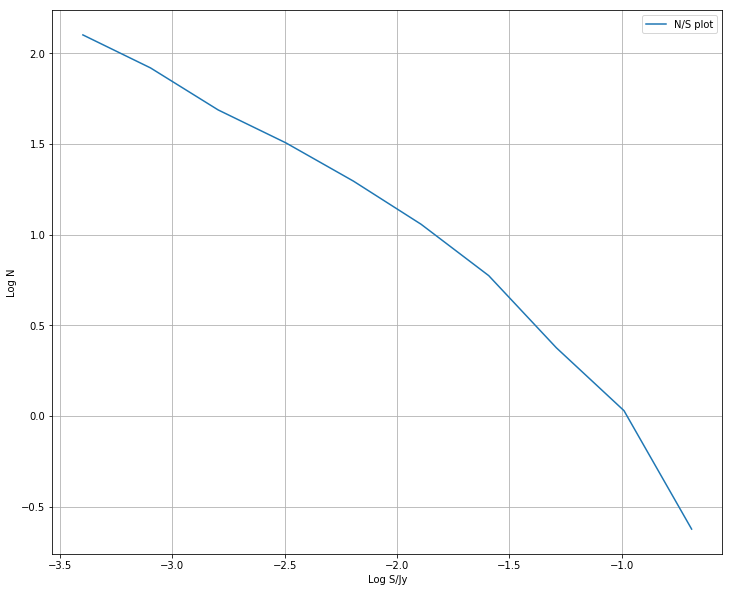

In [40]:
%pylab inline
from numpy import log10
s=log10((204.8, 102.4, 51.2, 25.6, 12.8, 6.4, 3.2, 1.6, 0.8, 0.4)) -3 # subtract 3 to get Jy scale
#print len(s)
n=log10((2.,(2+7),(2+7+11),(2+7+11+30),(2+7+11+30+46),(2+7+11+30+46+70),\
        (2+7+11+30+46+70+104),(2+7+11+30+46+70+104+140),(2+7+11+30+46+70+104+140+289),\
        (2+7+11+30+46+70+104+140+289+364)))\
        -log10(8.42)
#print len(s),len(n)
pylab.figure(1,figsize=(12,10))
pylab.plot(s,n,label='N/S plot') 
pylab.grid()
pylab.xlabel('Log S/Jy')
pylab.ylabel('Log N')
pylab.legend()
pylab.show()

In [41]:
# number of sources >1mJy
N=2+7+11+30+46+70+104+140+289
area=8.42
print " sources per sq deg >1mJy", N/area

 sources per sq deg >1mJy 83.0166270784


In [42]:
def Spass(f,theta):
    """
    f is frequency in GHz
    theta is HPBW in arcmiutes
    sigma in milliJansky
    """
    sigma=0.2*theta**2/(f**0.7)
    return sigma

In [43]:
print Spass(1.8,60)


477.13551381
